In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Boston Demo data
We will pick `average number of rooms per dwelling` or the `RM` variable.
It is a **ratio-scale** variable

In [2]:
from sklearn.datasets import load_boston
tmp = load_boston()
x = tmp.data[:,5]

In [3]:
np.random.shuffle(x)
x1 = x[:int(len(x)*.9)]
x2 = x[int(len(x)*.9):]

## Sklearn API class interface

In [4]:
from pctl_scale import PercentileScaler
scaler = PercentileScaler(upper=.8, lower=.1)
scaler.fit(x1)  # fit in-sample
y1 = scaler.transform(x1)  # transform in-sample
y2 = scaler.transform(x2)  # transform new data

## Display Results

In [5]:
print("{0:3.0f}% percentile value: {1:8.4f}".format(scaler.lower*100, scaler.pctl_lower))
print("{0:3.0f}% percentile value: {1:8.4f}".format(scaler.upper*100, scaler.pctl_upper))

 10% percentile value:   5.5792
 80% percentile value:   6.7280


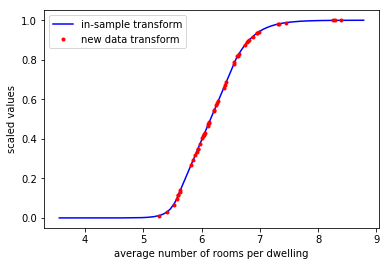

In [6]:
idx = x1.argsort()
plt.plot(x1[idx], y1[idx], 'b-', label='in-sample transform');

idx = x2.argsort()
plt.plot(x2[idx], y2[idx], 'r.', label='new data transform');

plt.xlabel('average number of rooms per dwelling');
plt.ylabel('scaled values');
plt.legend();